<a href="https://colab.research.google.com/github/SirArthurNerdolot1/FOOD101/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOOD101 FINAL PROJECT

# Extracting Data

In [58]:
!git clone https://github.com/Bhavnoor-Coders-1010/food101.git

fatal: destination path 'food101' already exists and is not an empty directory.


In [59]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [60]:
#defining labels
classes={0 : 'burger',
1 : 'butter_naan',
2 : 'chai',
3 : 'chapati',
4 : 'chole_bhature',
5 : 'dal_makhani',
6 : 'dhokla',
7 : 'fried_rice',
8 : 'idli',
9 : 'jalebi',
10 : 'kathi_roll',
11 : 'kadhai_paneer',
12 : 'kulfi',
13 : 'masala_dosa',
14 : 'momos',
15 : 'paani_puri',
16 : 'pakode',
17 : 'pav_bhaji',
18 : 'pizza',
19 : 'samosa'
           }

In [61]:
def print_mapped_labels(label_indices, label_dic):
    mapped_labels = [label_dic[index] for index in label_indices]
    print(mapped_labels)

In [62]:
train_df = pd.read_csv('/content/food101/DataFOOD101/train.csv')
test_df = pd.read_csv('/content/food101/DataFOOD101/test.csv')
train_df.head()

,imagePath,label
0,0342.jpg,2
1,1077.jpg,0
2,2314.jpg,11
3,3068.jpg,0
4,4121.jpg,13


In [63]:
print("Training labels:")
print_mapped_labels(train_df['label'], classes)
print("Testing labels:")
print_mapped_labels(test_df['label'], classes)

Training labels:
['chai', 'burger', 'kadhai_paneer', 'burger', 'masala_dosa', 'momos', 'kulfi', 'dal_makhani', 'pav_bhaji', 'burger', 'dal_makhani', 'momos', 'idli', 'pav_bhaji', 'kathi_roll', 'pizza', 'chole_bhature', 'chapati', 'butter_naan', 'pakode', 'momos', 'masala_dosa', 'fried_rice', 'masala_dosa', 'pav_bhaji', 'jalebi', 'chai', 'chai', 'dhokla', 'burger', 'chai', 'dhokla', 'pakode', 'idli', 'idli', 'burger', 'chai', 'burger', 'jalebi', 'kadhai_paneer', 'kadhai_paneer', 'idli', 'chapati', 'dal_makhani', 'dhokla', 'kulfi', 'butter_naan', 'butter_naan', 'chole_bhature', 'dal_makhani', 'butter_naan', 'idli', 'masala_dosa', 'pakode', 'kulfi', 'chole_bhature', 'kadhai_paneer', 'masala_dosa', 'pav_bhaji', 'jalebi', 'masala_dosa', 'idli', 'chai', 'masala_dosa', 'fried_rice', 'masala_dosa', 'chai', 'kadhai_paneer', 'butter_naan', 'burger', 'butter_naan', 'dal_makhani', 'idli', 'dal_makhani', 'dal_makhani', 'chapati', 'kadhai_paneer', 'fried_rice', 'pakode', 'fried_rice', 'chai', 'kathi

In [64]:
#extracting image with help of file location given in csv and resizig it
def load_and_preprocess_image(image_path, image_folder,target_size=(128, 128)):
    try:
        full_path = os.path.join(image_folder, image_path)
        image = load_img(full_path, target_size=target_size)
        image = img_to_array(image)
        image = image / 255.0 #normalizing the array
        return image
    except FileNotFoundError:
        print(f"File not found: {image_path}")
        return None

In [65]:
#applying data augmentation on file
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [66]:
train_images = []
train_labels = []
for img_path, label in zip(train_df['imagePath'], train_df['label']):
    image_train = load_and_preprocess_image(img_path,'/content/food101/DataFOOD101/Train')
    if image_train is not None:
        train_images.append(image_train)
        train_labels.append(label)

In [67]:
train_images = np.array(train_images)
train_labels = to_categorical(train_labels, num_classes=20)

In [68]:
test_images = []
test_labels = []
for img_path, label in zip(test_df['imagePath'], test_df['label']):
    image_test = load_and_preprocess_image(img_path,'/content/food101/DataFOOD101/Test')
    if image_test is not None:
        test_images.append(image_test)
        test_labels.append(label)

In [69]:
test_images = np.array(test_images)
test_labels = to_categorical(test_labels, num_classes=20)

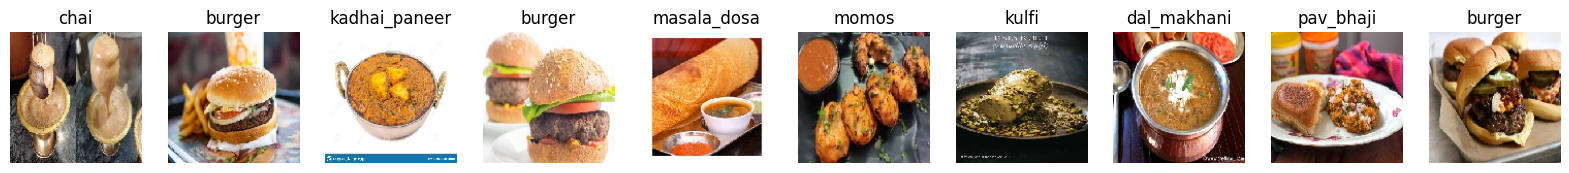

In [70]:
fig, axes = plt.subplots(1, 10, figsize=(20, 20))
for i in range(10):
    image = train_images[i]
    axes[i].imshow(image)
    label_index = np.argmax(train_labels[i])
    axes[i].set_title(classes[label_index])
    axes[i].axis('off')
plt.show()

# Model training

In [71]:
# Using transfer learning with MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

In [72]:
#initially freezing layers
for layer in base_model.layers:
    layer.trainable = False

In [73]:
print('Number of images in the training dataset:', train_images.shape[0])
print('Number of images in the testing dataset:', test_images.shape[0])

Number of images in the training dataset: 5314
Number of images in the testing dataset: 939


In [74]:
print(f"Shape of the images in the training dataset: {train_images[0].shape}")

Shape of the images in the training dataset: (128, 128, 3)


In [75]:

model = Sequential([
    base_model,
      GlobalAveragePooling2D(),
      Dense(512, activation='relu'),
      Dropout(0.5),
      Dense(256, activation='relu'),
      Dropout(0.5),
      Dense(20, activation='softmax')
])

In [76]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=20, validation_data=(test_images, test_labels))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


167/167 ━━━━━━━━━━━━━━━━━━━━ 33s 159ms/step - accuracy: 0.1749 - loss: 2.9938 - val_accuracy: 0.6305 - val_loss: 1.3722
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 34s 135ms/step - accuracy: 0.5015 - loss: 1.6598 - val_accuracy: 0.7210 - val_loss: 1.0013
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.5928 - loss: 1.3834 - val_accuracy: 0.7242 - val_loss: 0.9336
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 43s 139ms/step - accuracy: 0.6455 - loss: 1.2090 - val_accuracy: 0.7476 - val_loss: 0.8713
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 40s 131ms/step - accuracy: 0.6577 - loss: 1.1552 - val_accuracy: 0.7689 - val_loss: 0.8081
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 39s 122ms/step - accuracy: 0.6814 - loss: 1.0611 - val_accuracy: 0.7785 - val_loss: 0.7611
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 43s 136ms/step - accuracy: 0.7092 - loss: 0.9801 - val_accuracy: 0.7785 - val_loss: 0.7472
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.7129 - loss: 0.9862 - val

In [78]:
#unfreeze some layers for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

In [79]:
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
# Fine-tuning for better performance
model.fit(datagen.flow(train_images, train_labels, batch_size=32),
          epochs=20,
          validation_data=(test_images, test_labels))

Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 43s 182ms/step - accuracy: 0.6533 - loss: 1.4137 - val_accuracy: 0.7455 - val_loss: 0.9493
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.7107 - loss: 1.0118 - val_accuracy: 0.7614 - val_loss: 0.8576
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - accuracy: 0.7392 - loss: 0.9399 - val_accuracy: 0.7817 - val_loss: 0.7876
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 40s 142ms/step - accuracy: 0.7466 - loss: 0.8728 - val_accuracy: 0.8030 - val_loss: 0.7434
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 42s 148ms/step - accuracy: 0.7529 - loss: 0.8677 - val_accuracy: 0.8104 - val_loss: 0.7149
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - accuracy: 0.7781 - loss: 0.7520 - val_accuracy: 0.8030 - val_loss: 0.7094
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.7735 - loss: 0.7827 - val_accuracy: 0.8115 - val_loss: 0.6968
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 41s 144ms/step - accuracy: 0.7778 - loss: 0

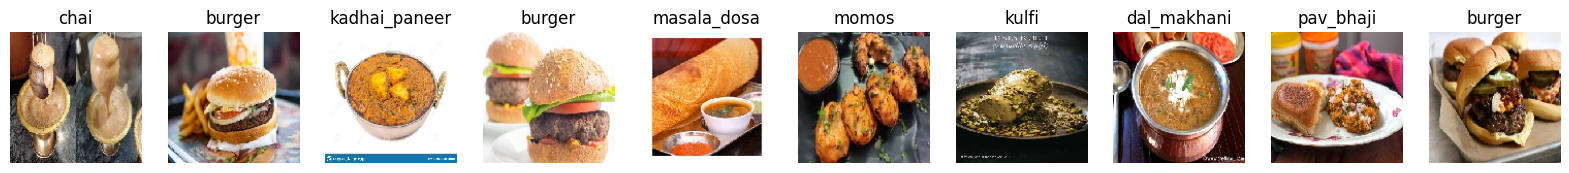

In [81]:
fig, axes = plt.subplots(1, 10, figsize=(20, 20))
for i in range(10):
    image = train_images[i]
    axes[i].imshow(image)
    label_index = np.argmax(train_labels[i])
    axes[i].set_title(classes[label_index])
    axes[i].axis('off')
plt.show()

# Printing prediction labels

In [82]:
def view_classification(image, probabilities, label_dict):
    fig, ax = plt.subplots(figsize=(6, 9))
    ax.imshow(image)
    ax.axis('off')
    plt.figure(figsize=(10, 5))
    plt.barh(np.arange(20), probabilities)
    plt.yticks(np.arange(20), [label_dict[i] for i in range(20)])
    plt.xlabel('Probability')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


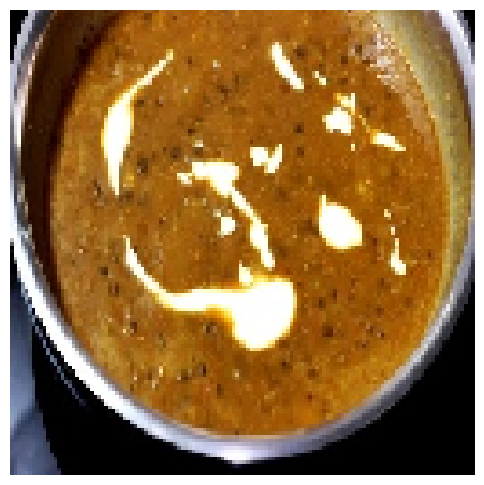

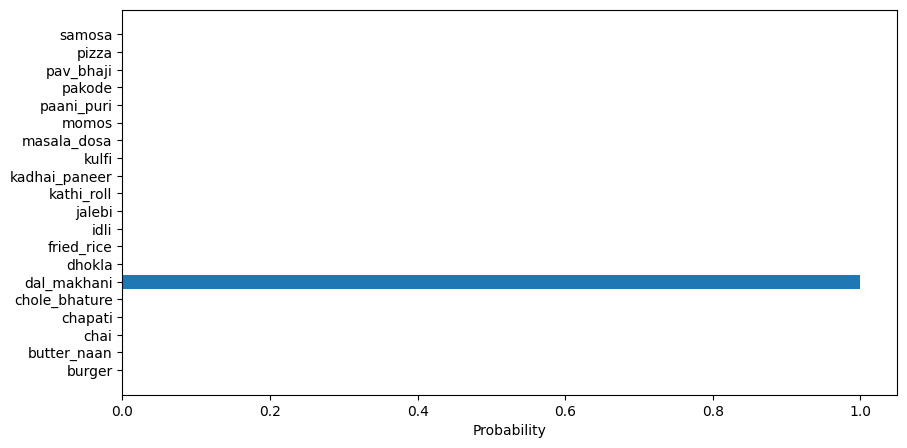

In [83]:
index = 0
image, label = test_images[index], test_labels[index]
probabilities = model.predict(image.reshape(1, 128, 128, 3))[0]
view_classification(image, probabilities, classes)

In [88]:
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=[classes[i] for i in range(20)]))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Classification Report:
               precision    recall  f1-score   support

       burger       0.95      0.93      0.94        40
  butter_naan       0.78      0.68      0.73        53
         chai       0.86      0.93      0.89        55
      chapati       0.76      0.83      0.79        65
chole_bhature       0.89      0.86      0.88        57
  dal_makhani       0.79      0.79      0.79        47
       dhokla       0.81      0.73      0.77        48
   fried_rice       0.84      0.96      0.90        55
         idli       0.82      1.00      0.90        40
       jalebi       0.95      0.95      0.95        43
   kathi_roll       0.80      0.81      0.80        43
kadhai_paneer       0.91      0.86      0.88        69
        kulfi       0.71      0.56      0.62        36
  masala_dosa       0.85      0.92      0.89        51
        momos       0.78      0.90      0.84        52
   paani_puri       0.77      0.77      0.77        22
 

In [87]:
#saving model
model.save('food_classifier_model.h5')
